<a href="https://colab.research.google.com/github/syllasn/Enseignements_UADB/blob/main/labs_MLP_UADB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import pandas as pd
from sklearn.datasets import make_blobs

In [9]:
X,Y = make_blobs(n_samples=50, n_features=4, random_state=0,centers= 2)

In [3]:
import tensorflow as tf
# initialisation du model
model = tf.keras.models.Sequential()

#. 1 . input layer 
model.add(tf.keras.layers.Dense(3, input_dim= 4 , activation='relu'))
#  2; Couche cachees
model.add(tf.keras.layers.Dense(5,activation= 'sigmoid' ))
model.add(tf.keras.layers.Dense(3,activation= 'sigmoid' ))

# 3 / output layer
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 15        
                                                                 
 dense_1 (Dense)             (None, 5)                 20        
                                                                 
 dense_2 (Dense)             (None, 3)                 18        
                                                                 
 dense_3 (Dense)             (None, 1)                 4         
                                                                 
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


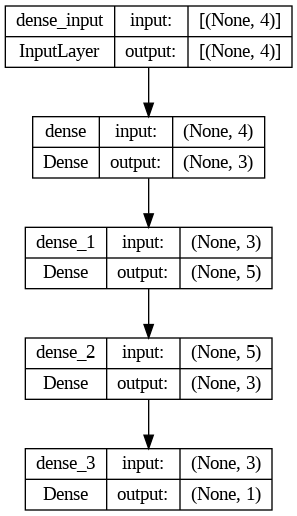

In [5]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [6]:
# implementer fonction de cout et optimizateur
model.compile(optimizer = 'SGD', loss = 'binary_crossentropy', metrics =['accuracy'] )

## Training model

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=00.2, random_state = 0)

In [12]:
model.fit(x=X_train, y = Y_train, validation_data = (X_test, Y_test),   epochs = 50)

Epoch 1/50
2/2 [==============================] - 0s 70ms/step - loss: 0.7401 - accuracy: 0.5000 - val_loss: 0.7392 - val_accuracy: 0.5000
Epoch 2/50
2/2 [==============================] - 0s 33ms/step - loss: 0.7395 - accuracy: 0.5000 - val_loss: 0.7387 - val_accuracy: 0.5000
Epoch 3/50
2/2 [==============================] - 0s 32ms/step - loss: 0.7388 - accuracy: 0.5000 - val_loss: 0.7377 - val_accuracy: 0.5000
Epoch 4/50
2/2 [==============================] - 0s 32ms/step - loss: 0.7377 - accuracy: 0.5000 - val_loss: 0.7363 - val_accuracy: 0.5000
Epoch 5/50
2/2 [==============================] - 0s 31ms/step - loss: 0.7363 - accuracy: 0.5000 - val_loss: 0.7347 - val_accuracy: 0.5000
Epoch 6/50
2/2 [==============================] - 0s 31ms/step - loss: 0.7347 - accuracy: 0.5000 - val_loss: 0.7334 - val_accuracy: 0.5000
Epoch 7/50
2/2 [==============================] - 0s 32ms/step - loss: 0.7338 - accuracy: 0.5000 - val_loss: 0.7333 - val_accuracy: 0.5000
Epoch 8/50
2/2 [===========

# MLP regression

In [15]:
# importation des donnees
from sklearn.datasets import fetch_openml
load_boston = fetch_openml(name = 'boston')
data = load_boston['data']
target  = load_boston['target']
features = load_boston['feature_names']

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:301: UserWarning: Multiple active versions of the dataset matching the name boston exist. Versions may be fundamentally different, returning version 1.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [8]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33


In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import regularizers
def model_five_layers(dim_data):
  model = Sequential()
  model.add(Dense(100, input_dim =dim_data, activation= 'sigmoid', kernel_regularizer= regularizers.l2(0.01))) # coiuche entrees
  model.add(Dense(150, activation='relu'))
  model.add(Dropout(0.4))
  model.add(Dense(100, activation='sigmoid'))
  model.add(Dropout(0.3))
  model.add(Dense(30, activation='sigmoid'))
  model.add(Dense(100, activation='sigmoid',kernel_regularizer= regularizers.l2(0.2)))
  model.add(Dense(1, activation='linear'))

  model.compile(optimizer ='SGD', loss ='mean_squared_error')

  return model

In [28]:
# preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_cr = StandardScaler().fit_transform(data)
X_train, X_test, Y_train,Y_test = train_test_split(X_cr, target, test_size=0.2, random_state=0)

In [34]:
# Apprentissage
from tensorflow.keras.callbacks import EarlyStopping
callbacks = [EarlyStopping(monitor ='val_loss', patience = 50 )]
model = model_five_layers(X_train.shape[1])
model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs = 500,callbacks=callbacks)

Epoch 1/500
13/13 [==============================] - 1s 19ms/step - loss: 147.7314 - val_loss: 97.1414
Epoch 2/500
13/13 [==============================] - 0s 8ms/step - loss: 94.3303 - val_loss: 95.1845
Epoch 3/500
13/13 [==============================] - 0s 6ms/step - loss: 94.8456 - val_loss: 88.3210
Epoch 4/500
13/13 [==============================] - 0s 5ms/step - loss: 92.0171 - val_loss: 92.0192
Epoch 5/500
13/13 [==============================] - 0s 7ms/step - loss: 92.3425 - val_loss: 87.0519
Epoch 6/500
13/13 [==============================] - 0s 6ms/step - loss: 90.4227 - val_loss: 87.2969
Epoch 7/500
13/13 [==============================] - 0s 7ms/step - loss: 90.0698 - val_loss: 82.9026
Epoch 8/500
13/13 [==============================] - 0s 7ms/step - loss: 81.0963 - val_loss: 84.7191
Epoch 9/500
13/13 [==============================] - 0s 7ms/step - loss: 70.6344 - val_loss: 97.4278
Epoch 10/500
13/13 [==============================] - 0s 8ms/step - loss: 60.6340 - val_l

In [35]:
# metrics 
from sklearn.metrics import mean_squared_error
mean_squared_error(model.predict(X_test), Y_test)

4/4 [==============================] - 0s 3ms/step


25.551579449144395